<a href="https://colab.research.google.com/github/MandalaSandeep16/Audio-Visuvalization-compression/blob/main/gnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
#Load the datset
dataset=pd.read_csv('/content/drive/MyDrive/SO2_MODIFIED.csv')

#selectt the column 'v for the prediction
selected_col= '29209010'

In [ ]:
#Spliting the data
train_data, test_data = train_test_split(dataset[selected_col], test_size=0.2, shuffle=False)
#define the forcasting horiz
forecast_horizon = 24

In [ ]:

# Normalize the training data
train_mean = train_data.mean()
train_std = train_data.std()
train_data_normalized = (train_data - train_mean) / train_std

In [ ]:

# Normalize the test data using the same mean and std from training data
test_data_normalized = (test_data - train_mean) / train_std


In [ ]:
# create a dataset function
def create_dataset(data, forecast_horizon):
  X, y = [], []
  for i in range(len(data)-forecast_horizon-1):
    X.append(data[i:(i+forecast_horizon)])
    # Ensure you are not going out of bounds
    if i + forecast_horizon < len(data):
        y.append(data[i+forecast_horizon])
  return np.array(X), np.array(y)

In [ ]:
# Prepare the training and test data

X_train, y_train = create_dataset(train_data.values, forecast_horizon)
X_test, y_test = create_dataset(test_data.values, forecast_horizon)


In [ ]:

# The test data is already prepared in the preceding code:
X_test, y_test = create_dataset(test_data.values, forecast_horizon)


In [ ]:

# Reshape the input data to fit the GNN model
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [ ]:
# The test data is already prepared in the preceding code:
X_test, y_test = create_dataset(test_data.values, forecast_horizon)

# Reshape the input data to fit the GNN model
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [ ]:
# prompt: Define the GRAPH NEURAL NETWORKS MODELS

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, GRU, Dropout, concatenate

# Define the GNN model
def create_gnn_model(input_shape):
  input_layer = Input(shape=input_shape)

  # GRU layer for temporal dependencies
  gru_layer = GRU(64, return_sequences=True)(input_layer)
  gru_layer = Dropout(0.2)(gru_layer)
  gru_layer = GRU(32)(gru_layer)
  gru_layer = Dropout(0.2)(gru_layer)

  # Dense layer for feature extraction
  dense_layer = Dense(32, activation='relu')(gru_layer)
  dense_layer = Dropout(0.2)(dense_layer)

  # Output layer
  output_layer = Dense(1)(dense_layer)

  model = Model(inputs=input_layer, outputs=output_layer)
  return model

# Create the GNN model
gnn_model = create_gnn_model((X_train_reshaped.shape[1], 1))
gnn_model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:

# Compile the GNN model
gnn_model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
# Train the GNN model
gnn_history = gnn_model.fit(
    X_train_reshaped, y_train,
    epochs=15,
    batch_size=32,
    validation_data=(X_test_reshaped, y_test)
)

Epoch 1/15
1278/1278 [==============================] - 32s 25ms/step - loss: 3.3438e-06 - val_loss: 2.6675e-06
Epoch 2/15
1278/1278 [==============================] - 32s 25ms/step - loss: 3.3312e-06 - val_loss: 1.8421e-06
Epoch 3/15
1278/1278 [==============================] - 34s 26ms/step - loss: 3.3176e-06 - val_loss: 2.4015e-06
Epoch 4/15
1278/1278 [==============================] - 33s 26ms/step - loss: 3.3131e-06 - val_loss: 1.8546e-06
Epoch 5/15
1278/1278 [==============================] - 33s 26ms/step - loss: 3.3371e-06 - val_loss: 2.5974e-06
Epoch 6/15
1278/1278 [==============================] - 32s 25ms/step - loss: 3.3095e-06 - val_loss: 3.7554e-06
Epoch 7/15
1278/1278 [==============================] - 33s 26ms/step - loss: 3.3440e-06 - val_loss: 3.2299e-06
Epoch 8/15
1278/1278 [==============================] - 33s 26ms/step - loss: 3.3060e-06 - val_loss: 1.8732e-06
Epoch 9/15
1278/1278 [==============================] - 32s 25ms/step - loss: 3.3479e-06 - val_loss: 2.1

In [ ]:
# Make predictions on the test data
gnn_predictions = gnn_model.predict(X_test_reshaped)

# Denormalize the predictions
gnn_predictions_denormalized = (gnn_predictions * train_std) + train_mean


319/319 [==============================] - 2s 6ms/step


In [ ]:
# Inverse transform the predictions to the original scale
gnn_predictions_denormalized = (gnn_predictions * train_std) + train_mean


In [ ]:
# Evaluate the GNN model
gnn_mse = mean_squared_error(y_test, gnn_predictions_denormalized)
print('GNN MSE:', gnn_mse)


GNN MSE: 2.2421977723858344e-06


In [ ]:
# prompt: Find the index of the first positive number in the test data

# Find the index of the first positive number in the test data
index_first_positive = next((i for i, num in enumerate(test_data) if num > 0), None)
print(f"Index of the first positive number in test data: {index_first_positive}")


Index of the first positive number in test data: 0


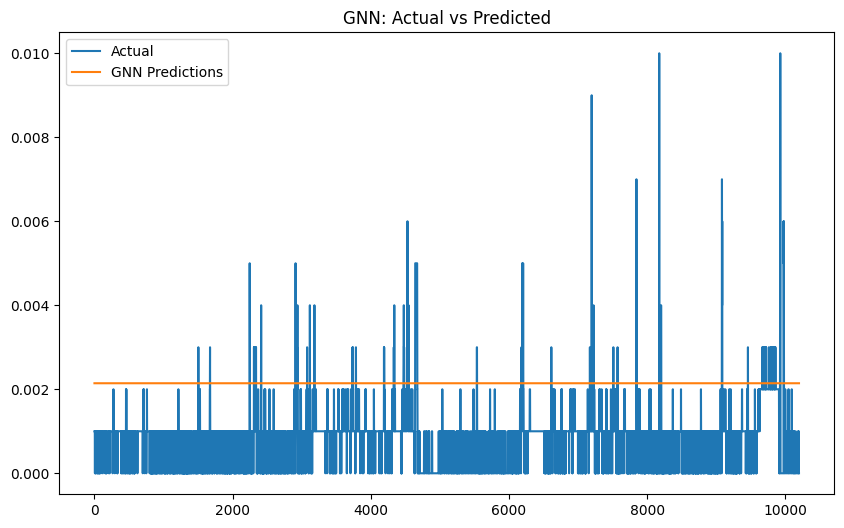

In [ ]:
# Plot the actual vs predicted values for GNN
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(gnn_predictions_denormalized, label='GNN Predictions')
plt.legend()
plt.title('GNN: Actual vs Predicted')
plt.show()
